In [2]:
function QR_decomposition(A)
    #using Gram-Schmidt Orthogonalization
    m,n = size(A)
    Q = zeros(m,n)
    R = zeros(n,n)
    for k = 1:n
        sum = 0
        for i = 1:k-1
            sum += dot(A[:,k],Q[:,i])*Q[:,i];
            if i < k
                R[i,k] = dot(A[:,k],Q[:,i])
            end
        end
        qtilde = A[:,k] - sum
        R[k,k] = norm(qtilde)
        q = (1/norm(qtilde))*qtilde;
        Q[:,k] = q
    end
        
    return Q, R
end

QR_decomposition (generic function with 1 method)

In [9]:
function HilbertMatrix(n)
    A = [1/(i + j - 1) for i in 1:n, j in 1:n]
end

HilbertMatrix (generic function with 1 method)

In [10]:
HilbertMatrix(3)

3×3 Array{Float64,2}:
 1.0       0.5       0.333333
 0.5       0.333333  0.25    
 0.333333  0.25      0.2     

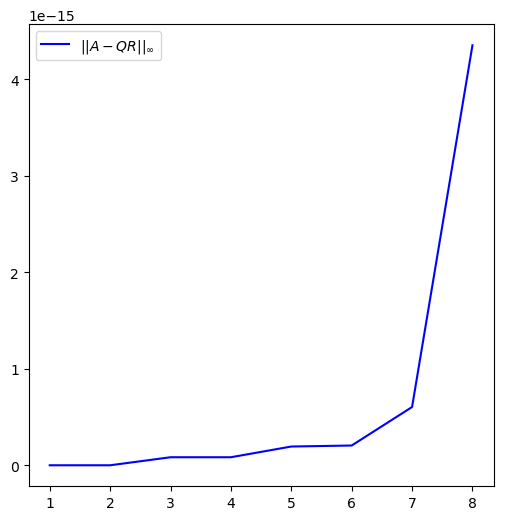

In [14]:
x = range(1,8)
y = zeros(8)
for k in x
    n = 2^k
    A = HilbertMatrix(n)
    Q,R = QR_decomposition(A)
    y[k] = norm(A - Q*R, Inf)
end

using PyPlot
figure(figsize = (6, 6))
    plot(x, y, linestyle = "-", marker = "", color = "b", label = L"$||A - QR||_{∞} $")
legend();